In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Simulation and Set Plots


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 15 iterations for X MPC.


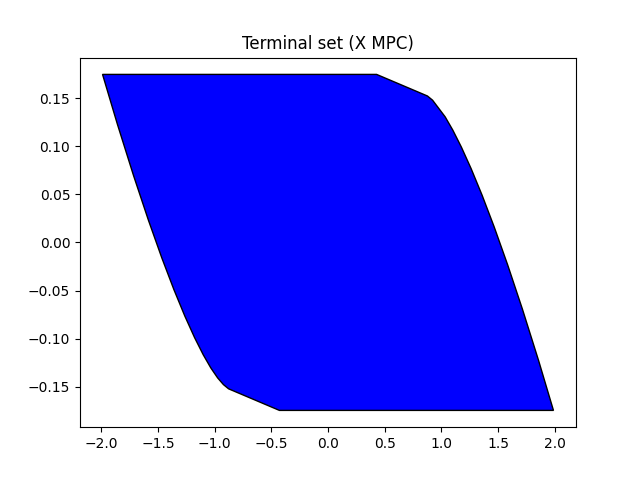

Maximum invariant set successfully computed after 15 iterations for Y MPC.


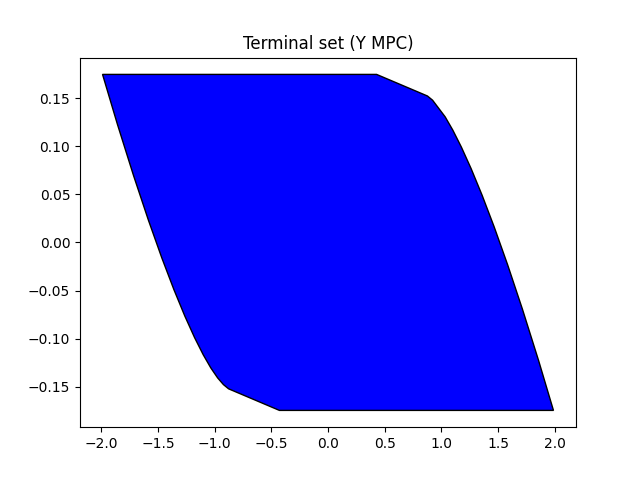

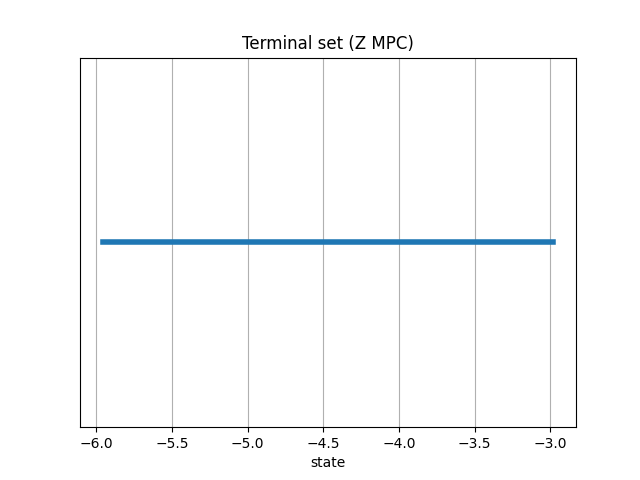

Maximum invariant set successfully computed after 46 iterations for Roll MPC.


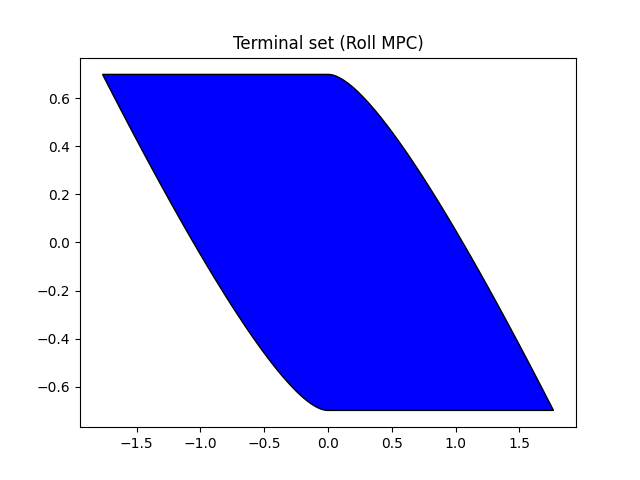

c:\Users\hippo\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


MPC problem: user_limit
[WARN] Input saturated: [-0.26190348] → [-0.26179939]
MPC problem: user_limit
[WARN] Input saturated: [0.26191628] → [0.26179939]

MPC problem: user_limit
[WARN] Input saturated: [-0.26190016] → [-0.26179939]
MPC problem: user_limit
[WARN] Input saturated: [0.26194142] → [0.26179939]

 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
MPC problem: user_limit



MPC problem: user_limit
MPC problem: user_limit

 State beta violation: -0.17 < -0

In [3]:
Ts = 0.05
sim_time = 20
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear"
)

Open Loop

In [4]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1]*0,
    x_cl[:, :-1]*0,
    u_cl*0,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: divide by zero encountered in scalar divide
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))
c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: invalid value encountered in cast
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))


Closed Loop

In [5]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1]
);

Closed and Open Loop

In [6]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);